In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
import numpy as np

def load_data():
    X = np.load("X.npy")
    y = np.load("y.npy")
    print(f"Shape of X: {X.shape}")
    print(f"Shape of y: {y.shape}")
    return X, y

x_train, y_train = load_data()

Shape of X: (5000, 400)
Shape of y: (5000, 1)


In [20]:
batch = 10
def get_batch(data, label):
  ix = torch.randint(0, 4989, (batch, ) )
  x = x_train[ix]
  y = y_train[ix]
  return x, y

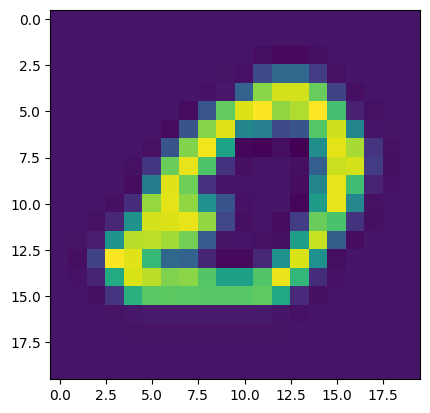

In [12]:
plt.imshow(x[1].reshape(20, 20))
plt.show()

In [115]:
g = torch.Generator().manual_seed(1667)
w = torch.randn((400, 10), dtype=torch.float32, generator=g,requires_grad=True)
b = torch.zeros(1, dtype=torch.float32, requires_grad=True)

In [116]:
lossi = []
for i in range(1000):
  x, y = get_batch(x_train, y_train)
  x = torch.tensor(x).to(torch.float32)
  y = torch.tensor(y).to(torch.int64)

  out = x @ w + b
  out = torch.exp(out)
  out = out/out.sum(dim=1, keepdim=True)

  y = y.view(-1)
  probs = out[torch.arange(10), y].log().sum()
  loss = -1 * probs/batch
  if i%100 == 0:
    print(loss.item())
  lossi.append(loss.item())
  w.grad = None
  b.grad = None
  loss.backward()

  w.data += -0.01*w.grad
  b.data += -0.01*b.grad


6.946225643157959
7.4820122718811035
6.59616231918335
5.1956892013549805
6.228562355041504
3.1643009185791016
1.7336076498031616
5.597298622131348
2.8954358100891113
3.631784439086914


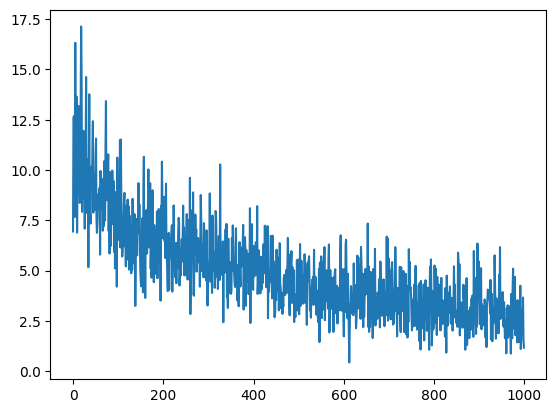

In [119]:
plt.plot(lossi)

In [125]:
optimizer = torch.optim.Adam([w, b], lr=0.001)
lossfunc = torch.nn.CrossEntropyLoss()

In [121]:
g = torch.Generator().manual_seed(1667)
w = torch.randn((400, 10), dtype=torch.float32, generator=g,requires_grad=True)
b = torch.zeros(1, dtype=torch.float32, requires_grad=True)

In [127]:
lossi = []
for i in range(1000):
  x, y = get_batch(x_train, y_train)
  x = torch.tensor(x).to(torch.float32)
  y = torch.tensor(y).to(torch.int64)

  out = x @ w + b
  # out = torch.exp(out)
  # out = out/out.sum(dim=1, keepdim=True)

  # y = y.view(-1)
  # probs = out[torch.arange(10), y].log().sum()
  # loss = -1 * probs/batch
  # if i%100 == 0:
  #   print(loss.item())
  # lossi.append(loss.item())
  # w.grad = None
  # b.grad = None
  # loss.backward()

  # w.data += -0.01*w.grad
  # b.data += -0.01*b.grad
  y = y.view(-1)
  loss = lossfunc(out, y)
  if i%100 == 0:
    print(loss.item())
  lossi.append(loss.item())

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

10.845422744750977
8.841157913208008
5.436795234680176
2.8286476135253906
3.7023441791534424
4.0153093338012695
1.595880150794983
3.8272337913513184
1.381801724433899
2.5976312160491943


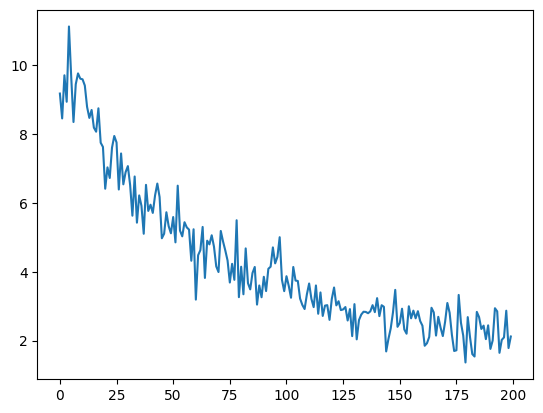

In [131]:
plt.plot(torch.tensor(lossi).view(-1, 5).mean(1))